# <center>**WATER, SANITATION AND HYGIENE**</center>

In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read CSV file from local directory
df = pd.read_csv(r'Data-Projects/Dataset/share-of-the-population-using-safely-managed-drinking-water-sources.csv')
df.head()

,Country,Year,Usage of safely managed drinking water services
0,Afghanistan,2000,11.093327
1,Afghanistan,2001,11.105221
2,Afghanistan,2002,12.007733
3,Afghanistan,2003,12.909922
4,Afghanistan,2004,13.818684


**DATA OVERVIEW**

In [3]:
print(df.shape)
print(df.info())

(5737, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5737 entries, 0 to 5736
Data columns (total 3 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Country                                          5737 non-null   object 
 1   Year                                             5737 non-null   int64  
 2   Usage of safely managed drinking water services  3784 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 134.6+ KB
None


In [4]:
#Rename Column for easy usage and analysis
df.rename(columns={
    'Country': 'country',
    'Year': 'year',
    'Usage of safely managed drinking water services': 'safe_water_usage'
}, inplace=True)
df.head()

,country,year,safe_water_usage
0,Afghanistan,2000,11.093327
1,Afghanistan,2001,11.105221
2,Afghanistan,2002,12.007733
3,Afghanistan,2003,12.909922
4,Afghanistan,2004,13.818684


In [5]:
#Change the year column to date datatype
df['year'] = pd.to_datetime(df['year'], format = '%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5737 entries, 0 to 5736
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   country           5737 non-null   object        
 1   year              5737 non-null   datetime64[ns]
 2   safe_water_usage  3784 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 134.6+ KB


In [6]:
#Check for Duplicate in the dataset
duplicate = df.duplicated().sum()
print('Number of Duplicates: ', duplicate)

Number of Duplicates:  0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5737 entries, 0 to 5736
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   country           5737 non-null   object        
 1   year              5737 non-null   datetime64[ns]
 2   safe_water_usage  3784 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 134.6+ KB


From the Information above, we noticed some missing values in the water usage column of the dataset.

In [8]:
df.isnull().sum()

country                0
year                   0
safe_water_usage    1953
dtype: int64

In [9]:
#Using groupby to check missing values
missing_by_country = df.groupby('country')['safe_water_usage'].mean()
missing_by_country

country
Afghanistan              20.237917
Africa (WHO)             25.927864
Albania                  62.007785
Algeria                  73.702565
American Samoa           87.329029
                           ...    
Western Pacific (WHO)          NaN
World                    66.808092
Yemen                          NaN
Zambia                         NaN
Zimbabwe                 28.013520
Name: safe_water_usage, Length: 254, dtype: float64

In [10]:
print('Number of Countries with no single data: ', missing_by_country.isnull().sum())

Number of Countries with no single data:  85


From the groupby above, we noticed that 85 countries, such as Western Pacific, Yemen, Zambia, etc., have no record of usage in the dataset

In [11]:
# Filter out the countries with no sigle data 
no_usage = df.groupby('country')['safe_water_usage'].apply(lambda x: x.isna().all())
no_usage = no_usage[no_usage == True].index.tolist()

df = df[~df['country'].isin(no_usage)]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3849 entries, 0 to 5736
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   country           3849 non-null   object        
 1   year              3849 non-null   datetime64[ns]
 2   safe_water_usage  3784 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 120.3+ KB
None


**UNIVARIATE ANALYSIS**

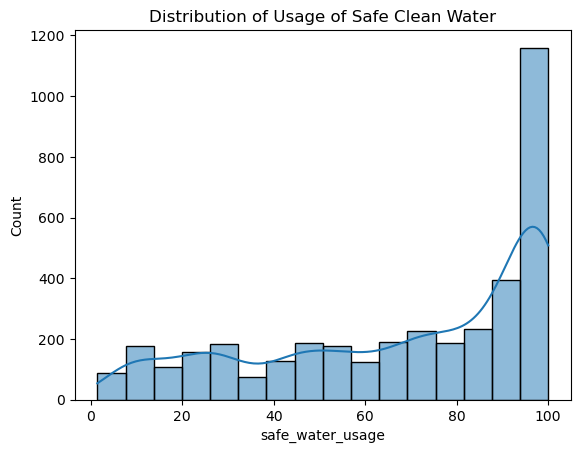

In [12]:
sns.histplot(data=df, x=df['safe_water_usage'], kde=True)
plt.title('Distribution of Usage of Safe Clean Water')

plt.show()

This distribution shows that access to safe drinking water is uneven worldwide. Most country-years cluster around 100%, indicating that many high-income countries have almost universal access. However, the widespread and smaller peaks at lower percentages (below 80%) reveal that many low- and middle-income countries still lack sufficient access. In short, the chart shows strong global inequality in safe water availability

In [13]:
aggregation = df['safe_water_usage'].agg(['min', 'max', 'mean', 'median', 'std', 'kurt', 'skew'])
print('*'*10, 'Safe Water Usage', '*'*10)
print(aggregation)

********** Safe Water Usage **********
min         1.430447
max       100.000000
mean       68.667447
median     77.848870
std        30.188662
kurt       -0.914106
skew       -0.669840
Name: safe_water_usage, dtype: float64


The Global Average safe water access is approximately 69%, with a standard deviation of 30

**BIVARIATE ANALYSIS**

**Which countries are below 10% safe water access?**

In [14]:
#Top countries with the least access to safe water usage
least_usage = df.groupby('country')['safe_water_usage'].mean().sort_values(ascending=True)
print('*'*10, 'Top 10 Countries with Least Safe Water Usage', '*'*10)
print(least_usage.head(10))

********** Top 10 Countries with Least Safe Water Usage **********
country
Chad                             5.855743
Tanzania                         6.902303
Central African Republic         7.189302
Sierra Leone                     7.518738
Tuvalu                           8.182518
Ethiopia                         8.555027
Uganda                           9.607007
Malawi                          11.836541
Democratic Republic of Congo    11.849325
Kiribati                        12.086918
Name: safe_water_usage, dtype: float64


So many African countries do not have very good access to safe, quality water usage, as shown here, with the least 10 having a usage of Less than 15%. This requires much more work to be done in the regions. The countries below 10% safe water access are Chad, Tanzania, the Central African Republic, Sierra Leone, Tuvalu, Ethiopia, and Uganda

**Which countries have achieved 100% safe water access?**

In [15]:
#Top countries with the highest access to safe water usage
high_usage = df.groupby('country')['safe_water_usage'].mean().sort_values(ascending=False)
print('*'*10, 'Top 10 Countries with Highest Safe Water Usage', '*'*10)
print(high_usage.head(10))

********** Top 10 Countries with Highest Safe Water Usage **********
country
Liechtenstein     100.000000
Monaco            100.000000
Singapore         100.000000
Gibraltar         100.000000
San Marino        100.000000
Kuwait            100.000000
Macao              99.987217
Netherlands        99.980883
Malta              99.931167
United Kingdom     99.926948
Name: safe_water_usage, dtype: float64


The leading countries that have achieved 100% safe water usage are Liechtenstein, Monaco, Singapore, Gibraltar, San Marino, and Kuwait

**How has global access to safe drinking water changed over time?**

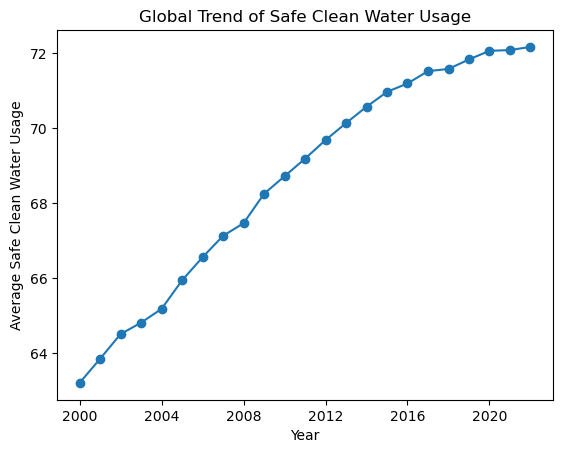

In [16]:
#Global Trend
trend = df.groupby('year')['safe_water_usage'].mean().reset_index()
plt.plot(trend['year'], trend['safe_water_usage'], marker='o')
plt.title('Global Trend of Safe Clean Water Usage')
plt.xlabel('Year')
plt.ylabel('Average Safe Clean Water Usage')

plt.show()

From the Global trend, there has been a consistent increase in the availability of safe water usage from 2000 to 2020, which is good news. With the introduction of SDGs in 2015, access to safe, quality water has continued to increase. There was a slowing down from the trend plot in 2020, which could be a result of the COVID-19 pandemic.

**How has access to safe drinking water in Nigeria changed over time?**

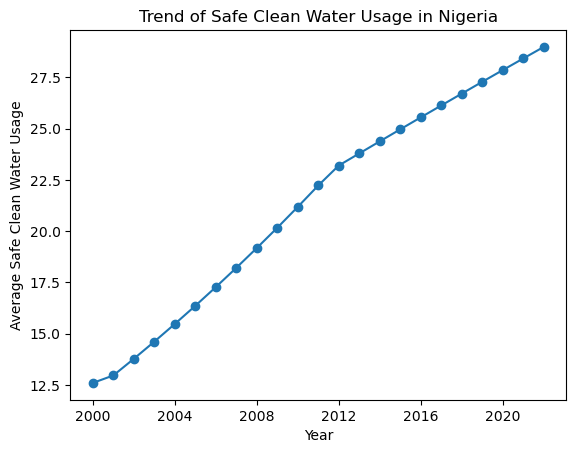

In [17]:
#Water usage trend in Nigeria
country = 'Nigeria'
nig_trend = df[df['country'] == 'Nigeria']

plt.plot(nig_trend['year'], nig_trend['safe_water_usage'], marker='o')
plt.title('Trend of Safe Clean Water Usage in Nigeria')
plt.xlabel('Year')
plt.ylabel('Average Safe Clean Water Usage')

plt.show()

Nigeria has experienced a consistent increase in access to safe, quality water since 2000, the highest thus far is below 30% which is still low, and require much improvement.

**ANOVA TESTING**

This is a statistical technique used to compare means between two or more groups. It is used to determine whether there are significant differences among the group means. It is particularly useful when you have more than two groups and you want to test if there are any differences in means across all groups

In [18]:
#Testing the variance of countries with the distribution of safe water usage

#Import Libraries
from scipy.stats import f_oneway
from scipy import stats

#Group the data
groups = [group['safe_water_usage'].dropna() for name, group in df.groupby('country')]

#Creating a function for the test
def one_way_anova(groups, significance_level):
    stat, p_val = stats.f_oneway(*groups)

    print('stat=%.3f, p_val=%.3f' % (stat, p_val))

    if p_val < significance_level:
        print('Reject H_0: there is a significant difference between groups')
    else:
        print('Accept H_0: there is no significant difference')
one_way_anova(groups, significance_level=0.05)

stat=995.189, p_val=0.000
Reject H_0: there is a significant difference between groups


It means that countries differ significantly in their access to safe drinking water — confirming that water access is not evenly distributed globally.

**CONCLUSION**

The analysis reveals substantial global variation in access to safe drinking water. Out of all countries analyzed, 85 countries — including Western Pacific nations, Yemen, Zambia, etc., have no recorded data on water usage, reflecting data gaps that may correspond to limited monitoring capacity.

The distribution of safe water usage shows that most high-income countries cluster have 100% access, while many low- and middle-income countries fall below 15%. This highlights severe inequality, with Sub-Saharan African nations such as Chad, Tanzania, the Central African Republic, Sierra Leone, Tuvalu, Ethiopia, and Uganda recording the lowest access levels. Conversely, countries like Liechtenstein, Monaco, Singapore, Gibraltar, San Marino, and Kuwait have achieved universal access.

The global trend from 2000 to 2020 indicates steady improvement in access to safe drinking water, particularly after the introduction of the Sustainable Development Goals (SDGs) in 2015. However, the slight slowdown observed around 2020 may reflect the impacts of the COVID-19 pandemic on infrastructure and data collection.

Country-level analysis, such as for Nigeria, shows gradual progress but still critically low coverage, with safe water usage below 30%.

Overall, the ANOVA results confirm that differences in safe water access between countries are statistically significant, meaning water access is not evenly distributed globally. Targeted investments and stronger policy action are urgently needed in regions lagging in achieving SDG 6.1 — universal and equitable access to safe drinking water for all by 2030.

**RECOMMENDATION**

Invest in clean water infrastructure, especially in low-access African countries.

Improve data collection to fill gaps in water usage reporting.

Focus on rural and low-income communities to ensure equitable access.

Build systems that can withstand crises like pandemics or droughts.